In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import requests
import lxml

In [ ]:
"""
Please uncomment the below line and change the associated email address to your GWU email id

"""
headers={'User-Agent' : 'George Washington University, yiliangxu@gwu.edu'}

### 1. Find the 2018 10-K filings from SEC Edgar

In [ ]:
# Create the base url to find all the filing data in 2018

baseurl1=r"https://www.sec.gov/Archives/edgar/daily-index/2018/QTR1/"
ext="index.json"
content1=requests.get(baseurl1+ext, headers=headers)
parse_content1=content1.json()

baseurl2=r"https://www.sec.gov/Archives/edgar/daily-index/2018/QTR2/"
ext="index.json"
content2=requests.get(baseurl2+ext, headers=headers)
parse_content2=content2.json()

baseurl3=r"https://www.sec.gov/Archives/edgar/daily-index/2018/QTR3/"
ext="index.json"
content3=requests.get(baseurl3+ext, headers=headers)
parse_content3=content3.json()

baseurl4=r"https://www.sec.gov/Archives/edgar/daily-index/2018/QTR4/"
ext="index.json"
content4=requests.get(baseurl4+ext, headers=headers)
parse_content4=content4.json()

In [ ]:
parse_content1['directory']['item']

[{'last-modified': '01/02/2018 10:03:10 PM',
  'name': 'company.20180102.idx',
  'type': 'file',
  'href': 'company.20180102.idx',
  'size': '666 KB'},
 {'last-modified': '01/03/2018 10:04:18 PM',
  'name': 'company.20180103.idx',
  'type': 'file',
  'href': 'company.20180103.idx',
  'size': '1278 KB'},
 {'last-modified': '01/04/2018 10:04:23 PM',
  'name': 'company.20180104.idx',
  'type': 'file',
  'href': 'company.20180104.idx',
  'size': '831 KB'},
 {'last-modified': '01/05/2018 10:03:46 PM',
  'name': 'company.20180105.idx',
  'type': 'file',
  'href': 'company.20180105.idx',
  'size': '519 KB'},
 {'last-modified': '01/08/2018 10:04:16 PM',
  'name': 'company.20180108.idx',
  'type': 'file',
  'href': 'company.20180108.idx',
  'size': '534 KB'},
 {'last-modified': '01/09/2018 10:03:38 PM',
  'name': 'company.20180109.idx',
  'type': 'file',
  'href': 'company.20180109.idx',
  'size': '433 KB'},
 {'last-modified': '01/10/2018 10:03:18 PM',
  'name': 'company.20180110.idx',
  'type'

In [ ]:
# Find all the master file in 2018
master_url1 = [baseurl1+filename['name'] for filename in parse_content1['directory']['item'] if "master" in filename['name']]
master_url2 = [baseurl2+filename['name'] for filename in parse_content2['directory']['item'] if "master" in filename['name']]
master_url3 = [baseurl3+filename['name'] for filename in parse_content3['directory']['item'] if "master" in filename['name']]
master_url4 = [baseurl4+filename['name'] for filename in parse_content4['directory']['item'] if "master" in filename['name']]

In [ ]:
master_url = master_url1 + master_url2 + master_url3 +master_url4
master_url

['https://www.sec.gov/Archives/edgar/daily-index/2018/QTR1/master.20180102.idx',
 'https://www.sec.gov/Archives/edgar/daily-index/2018/QTR1/master.20180103.idx',
 'https://www.sec.gov/Archives/edgar/daily-index/2018/QTR1/master.20180104.idx',
 'https://www.sec.gov/Archives/edgar/daily-index/2018/QTR1/master.20180105.idx',
 'https://www.sec.gov/Archives/edgar/daily-index/2018/QTR1/master.20180108.idx',
 'https://www.sec.gov/Archives/edgar/daily-index/2018/QTR1/master.20180109.idx',
 'https://www.sec.gov/Archives/edgar/daily-index/2018/QTR1/master.20180110.idx',
 'https://www.sec.gov/Archives/edgar/daily-index/2018/QTR1/master.20180111.idx',
 'https://www.sec.gov/Archives/edgar/daily-index/2018/QTR1/master.20180112.idx',
 'https://www.sec.gov/Archives/edgar/daily-index/2018/QTR1/master.20180116.idx',
 'https://www.sec.gov/Archives/edgar/daily-index/2018/QTR1/master.20180117.idx',
 'https://www.sec.gov/Archives/edgar/daily-index/2018/QTR1/master.20180118.idx',
 'https://www.sec.gov/Archiv

In [ ]:
master_info=pd.DataFrame()

for link in master_url:
    content=requests.get(link, headers=headers).text
    contentrows=content[content.find('CIK'):].split('\n')
    temp=pd.DataFrame([row.split('|') for row in contentrows[2:]])
    master_info=master_info.append(temp)

In [ ]:
master_info

,0,1,2,3,4
0,1000097,"KINGDON CAPITAL MANAGEMENT, L.L.C.",SC 13G/A,20180102,edgar/data/1000097/0000919574-18-000008.txt
1,1000228,HENRY SCHEIN INC,4,20180102,edgar/data/1000228/0001209191-18-000171.txt
2,1000228,HENRY SCHEIN INC,4,20180102,edgar/data/1000228/0001209191-18-000176.txt
3,1000275,ROYAL BANK OF CANADA,424B2,20180102,edgar/data/1000275/0001140361-18-000047.txt
4,1000275,ROYAL BANK OF CANADA,424B2,20180102,edgar/data/1000275/0001140361-18-000132.txt
...,...,...,...,...,...
2615,949509,OAKTREE CAPITAL MANAGEMENT LP,SC 13D/A,20181231,edgar/data/949509/0000950142-18-002483.txt
2616,9631,BANK OF NOVA SCOTIA,FWP,20181231,edgar/data/9631/0000914121-18-002540.txt
2617,96943,TELEFLEX INC,4,20181231,edgar/data/96943/0000096943-18-000210.txt
2618,98246,TIFFANY & CO,SC 13G,20181231,edgar/data/98246/0001061165-18-000018.txt


In [ ]:
master_info.columns = ['CIK','Company Name','Form Type','Date Filed','File Name'] 

In [ ]:
# Filter the 10-k filing
tenK = master_info[master_info['Form Type'] == '10-K']
tenK["Filestub"] = tenK["File Name"].str.split('.txt', expand=True)[0]
tenK

<ipython-input-11-79395a787e97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenK["Filestub"] = tenK["File Name"].str.split('.txt', expand=True)[0]


,CIK,Company Name,Form Type,Date Filed,File Name,Filestub
2700,1634293,"Exceed World, Inc.",10-K,20180102,edgar/data/1634293/0001599916-18-000002.txt,edgar/data/1634293/0001599916-18-000002
4066,863894,VERU INC.,10-K,20180102,edgar/data/863894/0001562762-17-000231.txt,edgar/data/863894/0001562762-17-000231
1236,1158420,CHINA HGS REAL ESTATE INC.,10-K,20180103,edgar/data/1158420/0001144204-18-000327.txt,edgar/data/1158420/0001144204-18-000327
5524,1614106,"American Renaissance Capital, Inc.",10-K,20180103,edgar/data/1614106/0001614106-18-000003.txt,edgar/data/1614106/0001614106-18-000003
5551,1617351,LEPOTA INC,10-K,20180103,edgar/data/1617351/0001617351-18-000002.txt,edgar/data/1617351/0001617351-18-000002
...,...,...,...,...,...,...
1490,1636051,FUSE ENTERPRISES INC.,10-K,20181231,edgar/data/1636051/0001185185-18-002263.txt,edgar/data/1636051/0001185185-18-002263
1606,1663641,Ando Holdings Ltd.,10-K,20181231,edgar/data/1663641/0001393905-18-000370.txt,edgar/data/1663641/0001393905-18-000370
1809,1704795,Bantek Inc.,10-K,20181231,edgar/data/1704795/0001213900-18-018073.txt,edgar/data/1704795/0001213900-18-018073
1883,1730773,Blue Star Foods Corp.,10-K,20181231,edgar/data/1730773/0001493152-18-018134.txt,edgar/data/1730773/0001493152-18-018134


In [ ]:
# Add a new column to find the filiing landing bpage
tenK['Landing page'] = "https://www.sec.gov/Archives/"+tenK['Filestub']+"-index.htm"
tenK

<ipython-input-12-f6c61581e05c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenK['Landing page'] = "https://www.sec.gov/Archives/"+tenK['Filestub']+"-index.htm"


,CIK,Company Name,Form Type,Date Filed,File Name,Filestub,Landing page
2700,1634293,"Exceed World, Inc.",10-K,20180102,edgar/data/1634293/0001599916-18-000002.txt,edgar/data/1634293/0001599916-18-000002,https://www.sec.gov/Archives/edgar/data/163429...
4066,863894,VERU INC.,10-K,20180102,edgar/data/863894/0001562762-17-000231.txt,edgar/data/863894/0001562762-17-000231,https://www.sec.gov/Archives/edgar/data/863894...
1236,1158420,CHINA HGS REAL ESTATE INC.,10-K,20180103,edgar/data/1158420/0001144204-18-000327.txt,edgar/data/1158420/0001144204-18-000327,https://www.sec.gov/Archives/edgar/data/115842...
5524,1614106,"American Renaissance Capital, Inc.",10-K,20180103,edgar/data/1614106/0001614106-18-000003.txt,edgar/data/1614106/0001614106-18-000003,https://www.sec.gov/Archives/edgar/data/161410...
5551,1617351,LEPOTA INC,10-K,20180103,edgar/data/1617351/0001617351-18-000002.txt,edgar/data/1617351/0001617351-18-000002,https://www.sec.gov/Archives/edgar/data/161735...
...,...,...,...,...,...,...,...
1490,1636051,FUSE ENTERPRISES INC.,10-K,20181231,edgar/data/1636051/0001185185-18-002263.txt,edgar/data/1636051/0001185185-18-002263,https://www.sec.gov/Archives/edgar/data/163605...
1606,1663641,Ando Holdings Ltd.,10-K,20181231,edgar/data/1663641/0001393905-18-000370.txt,edgar/data/1663641/0001393905-18-000370,https://www.sec.gov/Archives/edgar/data/166364...
1809,1704795,Bantek Inc.,10-K,20181231,edgar/data/1704795/0001213900-18-018073.txt,edgar/data/1704795/0001213900-18-018073,https://www.sec.gov/Archives/edgar/data/170479...
1883,1730773,Blue Star Foods Corp.,10-K,20181231,edgar/data/1730773/0001493152-18-018134.txt,edgar/data/1730773/0001493152-18-018134,https://www.sec.gov/Archives/edgar/data/173077...


In [ ]:
# Input the 125 company data
company_id = pd.read_csv('CompanyIDs for Project.csv')
company_id.rename(columns={'cik':'CIK'}, inplace = True)
company_id

,GVKEY,tic,conm,CIK,conml
0,1690,AAPL,APPLE INC,320193,Apple Inc
1,12141,MSFT,MICROSOFT CORP,789019,Microsoft Corp
2,64768,AMZN,AMAZON.COM INC,1018724,Amazon.com Inc
3,160329,GOOGL,ALPHABET INC,1652044,Alphabet Inc
4,2176,BRK.B,BERKSHIRE HATHAWAY,1067983,Berkshire Hathaway Inc
...,...,...,...,...,...
120,13721,ZTS,ZOETIS INC,1555280,Zoetis Inc
121,23812,REGN,REGENERON PHARMACEUTICALS,872589,Regeneron Pharmaceuticals Inc
122,161844,LVS,LAS VEGAS SANDS CORP,1300514,Las Vegas Sands Corp
123,15044,WDAY,WORKDAY INC,1327811,Workday Inc


In [ ]:
tenK.dtypes

CIK             object
Company Name    object
Form Type       object
Date Filed      object
File Name       object
Filestub        object
Landing page    object
dtype: object

In [ ]:
company_id.dtypes

GVKEY     int64
tic      object
conm     object
CIK       int64
conml    object
dtype: object

It seems that the CIK columns in two dataframe have differnet types, so first we need to convert the object into integer and then find the 125 companies information. We will also change the Date file type for the fueture usage. 

In [ ]:
tenK['CIK'] = tenK['CIK'].astype(str).astype(int)
tenK['Date Filed']= tenK['Date Filed'].apply(str).apply(lambda s: "{}-{}-{}".format(s[:4], s[4:6], s[6:]))

<ipython-input-16-fc2eb1b2ca67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenK['CIK'] = tenK['CIK'].astype(str).astype(int)
<ipython-input-16-fc2eb1b2ca67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenK['Date Filed']= tenK['Date Filed'].apply(str).apply(lambda s: "{}-{}-{}".format(s[:4], s[4:6], s[6:]))


In [ ]:
tenK.dtypes

CIK              int32
Company Name    object
Form Type       object
Date Filed      object
File Name       object
Filestub        object
Landing page    object
dtype: object

In [ ]:
company_10k = tenK.merge(company_id, on = ['CIK'])
company_10k

,CIK,Company Name,Form Type,Date Filed,File Name,Filestub,Landing page,GVKEY,tic,conm,conml
0,796343,ADOBE SYSTEMS INC,10-K,2018-01-22,edgar/data/796343/0000796343-18-000015.txt,edgar/data/796343/0000796343-18-000015,https://www.sec.gov/Archives/edgar/data/796343...,12540,ADBE,ADOBE INC,Adobe Inc
1,1065280,NETFLIX INC,10-K,2018-01-29,edgar/data/1065280/0001065280-18-000069.txt,edgar/data/1065280/0001065280-18-000069,https://www.sec.gov/Archives/edgar/data/106528...,147579,NFLX,NETFLIX INC,Netflix Inc
2,1133421,NORTHROP GRUMMAN CORP /DE/,10-K,2018-01-29,edgar/data/1133421/0001133421-18-000005.txt,edgar/data/1133421/0001133421-18-000005,https://www.sec.gov/Archives/edgar/data/113342...,7985,NOC,NORTHROP GRUMMAN CORP,Northrop Grumman Corp
3,1166691,COMCAST CORP,10-K,2018-01-31,edgar/data/1166691/0001166691-18-000004.txt,edgar/data/1166691/0001166691-18-000004,https://www.sec.gov/Archives/edgar/data/116669...,3226,CMCSA,COMCAST CORP,Comcast Corp
4,1326801,Facebook Inc,10-K,2018-02-01,edgar/data/1326801/0001326801-18-000009.txt,edgar/data/1326801/0001326801-18-000009,https://www.sec.gov/Archives/edgar/data/132680...,170617,FB,META PLATFORMS INC,Meta Platforms Inc
...,...,...,...,...,...,...,...,...,...,...,...
118,829224,STARBUCKS CORP,10-K,2018-11-16,edgar/data/829224/0000829224-18-000052.txt,edgar/data/829224/0000829224-18-000052,https://www.sec.gov/Archives/edgar/data/829224...,25434,SBUX,STARBUCKS CORP,Starbucks Corp
119,32604,EMERSON ELECTRIC CO,10-K,2018-11-19,edgar/data/32604/0000032604-18-000044.txt,edgar/data/32604/0000032604-18-000044,https://www.sec.gov/Archives/edgar/data/32604/...,4321,EMR,EMERSON ELECTRIC CO,Emerson Electric Co.
120,10795,BECTON DICKINSON & CO,10-K,2018-11-21,edgar/data/10795/0000010795-18-000036.txt,edgar/data/10795/0000010795-18-000036,https://www.sec.gov/Archives/edgar/data/10795/...,2111,BDX,BECTON DICKINSON & CO,Becton Dickinson and Co
121,315189,DEERE & CO,10-K,2018-12-17,edgar/data/315189/0001047469-18-007694.txt,edgar/data/315189/0001047469-18-007694,https://www.sec.gov/Archives/edgar/data/315189...,3835,DE,DEERE & CO,Deere & Co


 - Based on the output, we only find 123 companies in the master file from SEC Edgar. Then I will move on to get their annual report.

In [ ]:
tenk_list = list(company_10k['Landing page'].copy())
tic_list = list(company_10k['tic'].copy())

In [ ]:
tenk_list

['https://www.sec.gov/Archives/edgar/data/796343/0000796343-18-000015-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1065280/0001065280-18-000069-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1133421/0001133421-18-000005-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1166691/0001166691-18-000004-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1326801/0001326801-18-000009-index.htm',
 'https://www.sec.gov/Archives/edgar/data/875045/0000875045-18-000005-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1018724/0001018724-18-000005-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1035267/0001035267-18-000013-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1091667/0001091667-18-000025-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1467858/0001467858-18-000022-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1652044/0001652044-18-000007-index.htm',
 'https://www.sec.gov/Archives/edgar/data/936468/0000936468-18-000009-index.htm',
 'https

### 2. Download and clean 10-K files

In [ ]:
import os
os.getcwd()

'C:\\Users\\Master\\Documents\\Financial Models with python\\Final project'

In [ ]:
from urllib.request import Request, urlopen

 - To avoid downloading the 10K text file each time running the code, I changed the following cells' type.

The above codes are adapted from: https://community.mis.temple.edu/zuyinzheng/pythonworkshop/ (Topic 2: Web Scraping) and https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string

 - According to the result of the number of companies with stock price, we only have 122 companies without the BRK.B. Thus, we will also delect the 10-K file of BRK.B. 

In [ ]:
new_tic_list = tic_list.copy()
new_tic_list.remove("BRK.B")

In [ ]:
len(new_tic_list)

122

### 3. Do the text analysis to the 10-k filings of 123 companies

In [ ]:
import nltk
import string

In [ ]:
# Download the stopwords
nltk.download('stopwords')
stopwords= set(nltk.corpus.stopwords.words('english'))
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
stopwords=stopwords.union(set(string.punctuation))

In [ ]:
# Use LM dictionary to get positive words and negative words
with open('LM_Positive.txt') as file:
    LM_Positive=file.read().lower()

with open('LM_Negative.txt') as file:
    LM_Negative=file.read().lower()
    
positive_bag=nltk.tokenize.word_tokenize(LM_Positive)
negative_bag=nltk.tokenize.word_tokenize(LM_Negative)

 - The followling code is to read each company's 10-K file, tokenize the content and calculate the word frequency of positive words, negative words and netral words 

In [ ]:
def read_text(name):
    txt_path = "./10K_File/" + name + '.txt'
    txt_file = open(txt_path, 'r',)
    str_txt = txt_file.read().lower()
    return str_txt  

In [ ]:
pos_percent = []
neg_percent = []
net_percent = []

for i in range(len(new_tic_list)):  
    str_txt = read_text(new_tic_list[i])
    txt_words = nltk.tokenize.word_tokenize(str_txt)
    txt_ns_word = [w for w in txt_words if w not in stopwords]

    # Use lemma to lemmatize words 
    lemma = nltk.WordNetLemmatizer()
    txt_lemmawords = [lemma.lemmatize(w) for w in txt_ns_word]

    txt_wordfrq = nltk.FreqDist(txt_lemmawords)
    txt_freqs = pd.DataFrame(list(txt_wordfrq.items()))

    txt_freqs.columns = ['Tic', 'Pos Words']
    txt_pos = [w for w in txt_lemmawords if w in positive_bag]  # Find the posotive words in each 10K text
    txt_neg = [w for w in txt_lemmawords if w in negative_bag]  # Find the negeative words in each 10K text
    txt_net = [w for w in txt_lemmawords if w not in positive_bag and w not in negative_bag]  # Find the netural words from the 10k files
    
   
    pos_percent.append(len(txt_pos)/len(txt_lemmawords))
    
    neg_percent.append(len(txt_neg)/len(txt_lemmawords))
    net_percent.append(len(txt_net)/len(txt_lemmawords))
    print('Complete: ', i)

Complete:  0
Complete:  1
Complete:  2
Complete:  3
Complete:  4
Complete:  5
Complete:  6
Complete:  7
Complete:  8
Complete:  9
Complete:  10
Complete:  11
Complete:  12
Complete:  13
Complete:  14
Complete:  15
Complete:  16
Complete:  17
Complete:  18
Complete:  19
Complete:  20
Complete:  21
Complete:  22
Complete:  23
Complete:  24
Complete:  25
Complete:  26
Complete:  27
Complete:  28
Complete:  29
Complete:  30
Complete:  31
Complete:  32
Complete:  33
Complete:  34
Complete:  35
Complete:  36
Complete:  37
Complete:  38
Complete:  39
Complete:  40
Complete:  41
Complete:  42
Complete:  43
Complete:  44
Complete:  45
Complete:  46
Complete:  47
Complete:  48
Complete:  49
Complete:  50
Complete:  51
Complete:  52
Complete:  53
Complete:  54
Complete:  55
Complete:  56
Complete:  57
Complete:  58
Complete:  59
Complete:  60
Complete:  61
Complete:  62
Complete:  63
Complete:  64
Complete:  65
Complete:  66
Complete:  67
Complete:  68
Complete:  69
Complete:  70
Complete:  71
Co

In [ ]:
word_tuples = list(zip(new_tic_list, pos_percent, neg_percent, net_percent))
word_tuples

[('ADBE', 0.016464853372053827, 0.02235071434127622, 0.9611844322866699),
 ('NFLX', 0.011084249418419012, 0.023400082105551247, 0.9655156684760298),
 ('NOC', 0.012632257686333128, 0.023300800140684075, 0.9640669421729828),
 ('CMCSA', 0.008161149089791842, 0.014766879176588064, 0.9770719717336201),
 ('FB', 0.011289724665520844, 0.028948876082634044, 0.9597613992518451),
 ('BIIB', 0.01420935778307705, 0.019899679302688923, 0.965890962914234),
 ('AMZN', 0.010009395100093951, 0.0225482402254824, 0.9674423646744237),
 ('ISRG', 0.011298506060321338, 0.030278117072254064, 0.9584233768674246),
 ('CHTR', 0.007990129839609894, 0.01619567984646417, 0.9758141903139259),
 ('GM', 0.010451845095767496, 0.02751004511055784, 0.9620381097936747),
 ('GOOGL', 0.011410097936673956, 0.025831193939970208, 0.9627587081233558),
 ('LMT', 0.012440347513969899, 0.019822979973079902, 0.9677366725129501),
 ('ICE', 0.010539742212674544, 0.018478114930182598, 0.9709821428571429),
 ('PYPL', 0.009331771186614869, 0.030

In [ ]:
word_content = pd.DataFrame(word_tuples, columns = ['Ticker', 'Positive Percent', 'Negative Percent', 'Netural Percent'])
word_content.to_csv('word_content.csv')

 - It takes a long time to do the txt analysis of 122 companies, so I save the result to a csv file, which is easy to run.

In [ ]:
word_info = pd.read_csv('word_content.csv')
word_info

,Unnamed: 0,Ticker,Positive Percent,Negative Percent,Netural Percent
0,0,ADBE,0.016465,0.022351,0.961184
1,1,NFLX,0.011084,0.023400,0.965516
2,2,NOC,0.012632,0.023301,0.964067
3,3,CMCSA,0.008161,0.014767,0.977072
4,4,FB,0.011290,0.028949,0.959761
...,...,...,...,...,...
117,117,SBUX,0.010560,0.020736,0.968704
118,118,EMR,0.012102,0.019273,0.968625
119,119,BDX,0.010133,0.020266,0.969601
120,120,DE,0.008497,0.013140,0.978363


### 4. Download 122 companies stock daily prices

In [ ]:
import yfinance as yf
import datetime
from datetime import date, timedelta

In [ ]:
company_10k

,CIK,Company Name,Form Type,Date Filed,File Name,Filestub,Landing page,GVKEY,tic,conm,conml
0,796343,ADOBE SYSTEMS INC,10-K,2018-01-22,edgar/data/796343/0000796343-18-000015.txt,edgar/data/796343/0000796343-18-000015,https://www.sec.gov/Archives/edgar/data/796343...,12540,ADBE,ADOBE INC,Adobe Inc
1,1065280,NETFLIX INC,10-K,2018-01-29,edgar/data/1065280/0001065280-18-000069.txt,edgar/data/1065280/0001065280-18-000069,https://www.sec.gov/Archives/edgar/data/106528...,147579,NFLX,NETFLIX INC,Netflix Inc
2,1133421,NORTHROP GRUMMAN CORP /DE/,10-K,2018-01-29,edgar/data/1133421/0001133421-18-000005.txt,edgar/data/1133421/0001133421-18-000005,https://www.sec.gov/Archives/edgar/data/113342...,7985,NOC,NORTHROP GRUMMAN CORP,Northrop Grumman Corp
3,1166691,COMCAST CORP,10-K,2018-01-31,edgar/data/1166691/0001166691-18-000004.txt,edgar/data/1166691/0001166691-18-000004,https://www.sec.gov/Archives/edgar/data/116669...,3226,CMCSA,COMCAST CORP,Comcast Corp
4,1326801,Facebook Inc,10-K,2018-02-01,edgar/data/1326801/0001326801-18-000009.txt,edgar/data/1326801/0001326801-18-000009,https://www.sec.gov/Archives/edgar/data/132680...,170617,FB,META PLATFORMS INC,Meta Platforms Inc
...,...,...,...,...,...,...,...,...,...,...,...
118,829224,STARBUCKS CORP,10-K,2018-11-16,edgar/data/829224/0000829224-18-000052.txt,edgar/data/829224/0000829224-18-000052,https://www.sec.gov/Archives/edgar/data/829224...,25434,SBUX,STARBUCKS CORP,Starbucks Corp
119,32604,EMERSON ELECTRIC CO,10-K,2018-11-19,edgar/data/32604/0000032604-18-000044.txt,edgar/data/32604/0000032604-18-000044,https://www.sec.gov/Archives/edgar/data/32604/...,4321,EMR,EMERSON ELECTRIC CO,Emerson Electric Co.
120,10795,BECTON DICKINSON & CO,10-K,2018-11-21,edgar/data/10795/0000010795-18-000036.txt,edgar/data/10795/0000010795-18-000036,https://www.sec.gov/Archives/edgar/data/10795/...,2111,BDX,BECTON DICKINSON & CO,Becton Dickinson and Co
121,315189,DEERE & CO,10-K,2018-12-17,edgar/data/315189/0001047469-18-007694.txt,edgar/data/315189/0001047469-18-007694,https://www.sec.gov/Archives/edgar/data/315189...,3835,DE,DEERE & CO,Deere & Co


In [ ]:
# Convert the date string into date object
file_date = []

for d in company_10k['Date Filed']:
    date = datetime.date(*(int(s) for s in d.split('-')))
    file_date.append(date)
    
file_date    

[datetime.date(2018, 1, 22),
 datetime.date(2018, 1, 29),
 datetime.date(2018, 1, 29),
 datetime.date(2018, 1, 31),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 6),
 datetime.date(2018, 2, 6),
 datetime.date(2018, 2, 6),
 datetime.date(2018, 2, 7),
 datetime.date(2018, 2, 7),
 datetime.date(2018, 2, 7),
 datetime.date(2018, 2, 8),
 datetime.date(2018, 2, 8),
 datetime.date(2018, 2, 8),
 datetime.date(2018, 2, 8),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 12),
 datetime.date(2018, 2, 12),
 datetime.date(2018, 2, 13),
 datetime.date(2018, 2, 13),
 datetime.date(2018, 2, 13),
 datetime.date(2018, 2, 13),
 datetime.date(2018, 2, 13),
 datetime.date(2018, 2, 13),
 datetime.date(2018, 2, 14),
 datetime.date(2018, 2, 14),
 datet

In [ ]:
# Define the stare date and end date with timedelta
start_date = []
end_date = []

for i in file_date:
    date1 = i + timedelta(days = 1)
    date2 = date1 + timedelta(days = 60)
    start_date.append(date1)
    end_date.append(date2)

start_date

[datetime.date(2018, 1, 23),
 datetime.date(2018, 1, 30),
 datetime.date(2018, 1, 30),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 3),
 datetime.date(2018, 2, 3),
 datetime.date(2018, 2, 3),
 datetime.date(2018, 2, 7),
 datetime.date(2018, 2, 7),
 datetime.date(2018, 2, 7),
 datetime.date(2018, 2, 8),
 datetime.date(2018, 2, 8),
 datetime.date(2018, 2, 8),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 10),
 datetime.date(2018, 2, 10),
 datetime.date(2018, 2, 10),
 datetime.date(2018, 2, 10),
 datetime.date(2018, 2, 10),
 datetime.date(2018, 2, 10),
 datetime.date(2018, 2, 13),
 datetime.date(2018, 2, 13),
 datetime.date(2018, 2, 14),
 datetime.date(2018, 2, 14),
 datetime.date(2018, 2, 14),
 datetime.date(2018, 2, 14),
 datetime.date(2018, 2, 14),
 datetime.date(2018, 2, 14),
 datetime.date(2018, 2, 15),
 datetime.date(2018, 2, 15),
 

In [ ]:
end_date

[datetime.date(2018, 3, 24),
 datetime.date(2018, 3, 31),
 datetime.date(2018, 3, 31),
 datetime.date(2018, 4, 2),
 datetime.date(2018, 4, 3),
 datetime.date(2018, 4, 3),
 datetime.date(2018, 4, 4),
 datetime.date(2018, 4, 4),
 datetime.date(2018, 4, 4),
 datetime.date(2018, 4, 8),
 datetime.date(2018, 4, 8),
 datetime.date(2018, 4, 8),
 datetime.date(2018, 4, 9),
 datetime.date(2018, 4, 9),
 datetime.date(2018, 4, 9),
 datetime.date(2018, 4, 10),
 datetime.date(2018, 4, 10),
 datetime.date(2018, 4, 10),
 datetime.date(2018, 4, 10),
 datetime.date(2018, 4, 11),
 datetime.date(2018, 4, 11),
 datetime.date(2018, 4, 11),
 datetime.date(2018, 4, 11),
 datetime.date(2018, 4, 11),
 datetime.date(2018, 4, 11),
 datetime.date(2018, 4, 14),
 datetime.date(2018, 4, 14),
 datetime.date(2018, 4, 15),
 datetime.date(2018, 4, 15),
 datetime.date(2018, 4, 15),
 datetime.date(2018, 4, 15),
 datetime.date(2018, 4, 15),
 datetime.date(2018, 4, 15),
 datetime.date(2018, 4, 16),
 datetime.date(2018, 4, 16

In [ ]:
dailypri = pd.DataFrame()

for i, t in enumerate(new_tic_list):
    temp = yf.download(t, start_date[i], end_date[i], group_by = 'ticker' )
    temp['Ticker'] = t
    dailypri = dailypri.append(temp)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
target = dailypri[["Adj Close", "Ticker"]]
target

,Adj Close,Ticker
Date,,
2018-01-23,200.089996,ADBE
2018-01-24,197.779999,ADBE
2018-01-25,197.509995,ADBE
2018-01-26,201.300003,ADBE
2018-01-29,198.229996,ADBE
...,...,...
2019-02-11,248.181976,AVGO
2019-02-12,251.485458,AVGO
2019-02-13,253.222672,AVGO


In [ ]:
# Calculate the stock return 
target["Pct_change"] = target.groupby("Ticker")["Adj Close"].pct_change()
target

<ipython-input-41-0c0e52b00cd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target["Pct_change"] = target.groupby("Ticker")["Adj Close"].pct_change()


,Adj Close,Ticker,Pct_change
Date,,,
2018-01-23,200.089996,ADBE,NaN
2018-01-24,197.779999,ADBE,-0.011545
2018-01-25,197.509995,ADBE,-0.001365
2018-01-26,201.300003,ADBE,0.019189
2018-01-29,198.229996,ADBE,-0.015251
...,...,...,...
2019-02-11,248.181976,AVGO,0.006057
2019-02-12,251.485458,AVGO,0.013311
2019-02-13,253.222672,AVGO,0.006908


In [ ]:
# Caluculate the volatility of stock return
std_values = pd.DataFrame(target.groupby("Ticker")["Pct_change"].std().reset_index())
std_values

,Ticker,Pct_change
0,AAPL,0.025773
1,ABBV,0.026442
2,ABT,0.015147
3,ADBE,0.017983
4,ADP,0.006000
...,...,...
117,WDAY,0.019831
118,WFC,0.015832
119,WMT,0.011335
120,XOM,0.014346


In [ ]:
final_df = word_info.merge(std_values, on = ['Ticker'])
final_df

,Unnamed: 0,Ticker,Positive Percent,Negative Percent,Netural Percent,Pct_change
0,0,ADBE,0.016465,0.022351,0.961184,0.017983
1,1,NFLX,0.011084,0.023400,0.965516,0.030594
2,2,NOC,0.012632,0.023301,0.964067,0.017507
3,3,CMCSA,0.008161,0.014767,0.977072,0.020339
4,4,FB,0.011290,0.028949,0.959761,0.024688
...,...,...,...,...,...,...
117,117,SBUX,0.010560,0.020736,0.968704,0.015506
118,118,EMR,0.012102,0.019273,0.968625,0.018103
119,119,BDX,0.010133,0.020266,0.969601,0.018274
120,120,DE,0.008497,0.013140,0.978363,0.026420


### 5.  Analysis in volatility of stock return

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Features 
X = final_df.drop(['Unnamed: 0', 'Ticker', 'Pct_change'], axis = 1).copy()
X

,Positive Percent,Negative Percent,Netural Percent
0,0.016465,0.022351,0.961184
1,0.011084,0.023400,0.965516
2,0.012632,0.023301,0.964067
3,0.008161,0.014767,0.977072
4,0.011290,0.028949,0.959761
...,...,...,...
117,0.010560,0.020736,0.968704
118,0.012102,0.019273,0.968625
119,0.010133,0.020266,0.969601
120,0.008497,0.013140,0.978363


In [ ]:
# Response
y = final_df['Pct_change'].copy()
y

0      0.017983
1      0.030594
2      0.017507
3      0.020339
4      0.024688
         ...   
117    0.015506
118    0.018103
119    0.018274
120    0.026420
121    0.023793
Name: Pct_change, Length: 122, dtype: float64

 - Multivariate Regression 

In [ ]:
X.corr()

,Positive Percent,Negative Percent,Netural Percent
Positive Percent,1.000000,0.290811,-0.676699
Negative Percent,0.290811,1.000000,-0.901230
Netural Percent,-0.676699,-0.901230,1.000000


 - It is clear to see that Negative Percent is highly correlated with Netural Percent, we will remove the Netural Percent later to check the result again

In [ ]:
# Model
multi_reg = LinearRegression()

multi_reg.fit(X, y)

betas = pd.DataFrame(multi_reg.coef_)
betas.index = X.columns
betas.columns = ['Linear Regression']
betas

,Linear Regression
Positive Percent,-5.244508e+12
Negative Percent,-5.244508e+12
Netural Percent,-5.244508e+12


 - Remove the neutral words to check the result

In [ ]:
X = final_df.drop(['Unnamed: 0', 'Ticker', 'Pct_change', 'Netural Percent'], axis = 1).copy()
y = final_df['Pct_change'].copy()

X.corr()

,Positive Percent,Negative Percent
Positive Percent,1.000000,0.290811
Negative Percent,0.290811,1.000000


In [ ]:
# Model 2
multi_reg = LinearRegression()

multi_reg.fit(X, y)

betas = pd.DataFrame(multi_reg.coef_)
betas.index = X.columns
betas.columns = ['Linear Regression']
betas

,Linear Regression
Positive Percent,-0.159854
Negative Percent,0.269406


 - Plot 1

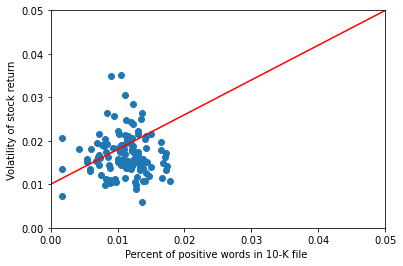

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(final_df['Positive Percent'], final_df['Pct_change'])
plt.xlabel('Percent of positive words in 10-K file ')
plt.ylabel('Volatility of stock return')
plt.xlim([0, 0.05])
plt.ylim([0, 0.05])
plt.plot([0.05, 0],[0.05, 0.01],'r-')
plt.show()

 - Plot 2

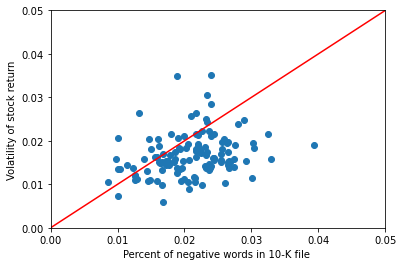

In [ ]:
plt.scatter(final_df['Negative Percent'], final_df['Pct_change'])
plt.xlabel('Percent of negative words in 10-K file ')
plt.ylabel('Volatility of stock return')
plt.xlim([0, 0.05])
plt.ylim([0, 0.05])
plt.plot([0.05, 0],[0.05, 0],'r-')
plt.show()

 - Plot 3

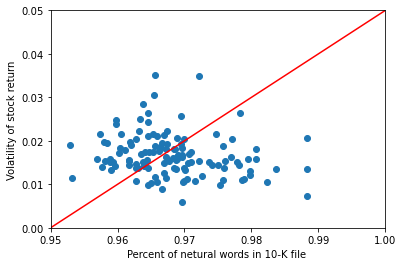

In [ ]:
plt.scatter(final_df['Netural Percent'], final_df['Pct_change'])
plt.xlabel('Percent of netural words in 10-K file ')
plt.ylabel('Volatility of stock return')
plt.xlim([0.95, 1])
plt.ylim([0, 0.05])
plt.plot([1, 0.95],[0.05, 0],'r-')
plt.show()